In [52]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import cross_val_score as CVS, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier 
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot
from xgboost import plot_importance
from datetime import datetime

from sklearn.metrics import accuracy_score

#from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings("ignore")

from time import time
import datetime

# df= pd.read_csv('file.csv')

df= pd.read_csv('__wind__.csv')


In [53]:
sam = 68630
df = df.iloc[:sam]

df2 = df

dfdata = df.loc[:,df.columns.drop('power')]

# dfdata = df.loc[:,['T','direction32','ws30','dir10','mslp','clc','senf','latf','swr','lwr','ps','T2m','RH2m','Time','month']]
dfpower = df['power']


def split_function(split,dfdata,dfpower,df2):
    '''
    这里写了个分列的函数，split 的意思是以多少分开（也许后期可以改成以多少百分比分开，只需要检测一下sample number就行），
    dfdata 是输入的那些数据pandas集， dfpower是输出的那些数据pandas集
    输出结果test代表验证集 train可以用来测试数据
    
    '''
    testData = dfdata.iloc[split:]
    testPower = dfpower.iloc[split:]
    trainPower = dfpower.iloc[:split]
    trainData = dfdata.iloc[:split]
    valid = df2.iloc[split:]
    return testData,testPower,trainPower,trainData,valid

split = 68530 # 从一万开始分开
X_test,y_test,y_train,X_train,valid = split_function(split,dfdata,dfpower,df2)



In [54]:
def R2_func(y_train,y_pred,word):
    R22  = r2_score(y_train,y_pred)
    print(word,R22)
    return R22

def rmse_func(y_prediction,y_real):
    return np.sqrt(MSE(y_prediction,y_real))

def smape_func(A,F):
    return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from sklearn.model_selection import RandomizedSearchCV


In [56]:
# 不能用labelEncoder
# le = LabelEncoder()
# Y_train = le.fit_transform(Y_train)

### fit model for train data
model = XGBRegressor()

 

In [57]:
from math import gamma

'''
params_s={'max_depth':[1,5,10,20,50],
            'n_estimitors':[5,10,30,100,500,1000],
            'learning_rate': [0.1,0.2, 0.3,0.5,0.8],
            'min_child_samples':[10,50,100,200],
            'colsample_bytree':[0.7,0.8,0.9,1.0],
            'gamma':[0,0.01,0.1,1],
            'subsample':[0.6, 0.7, 0.8, 0.9, 1],
            'reg_alpha':[0, 0.01,0.1, 1],
            'reg_lambda':[0, 0.1, 0.5, 1],
            
            }
model=RandomizedSearchCV(model,params_s,n_iter=100,scoring='neg_root_mean_squared_error',cv=5,verbose=1,random_state=42,n_jobs=-1)
model.fit(X_train, Y_train) 
model=GridSearchCV(model,params_s,scoring='neg_root_mean_squared_error',cv=2,verbose=1,n_jobs=-1)
best_part = model.best_params_
best_part

'''

"\nparams_s={'max_depth':[1,5,10,20,50],\n            'n_estimitors':[5,10,30,100,500,1000],\n            'learning_rate': [0.1,0.2, 0.3,0.5,0.8],\n            'min_child_samples':[10,50,100,200],\n            'colsample_bytree':[0.7,0.8,0.9,1.0],\n            'gamma':[0,0.01,0.1,1],\n            'subsample':[0.6, 0.7, 0.8, 0.9, 1],\n            'reg_alpha':[0, 0.01,0.1, 1],\n            'reg_lambda':[0, 0.1, 0.5, 1],\n            \n            }\nmodel=RandomizedSearchCV(model,params_s,n_iter=100,scoring='neg_root_mean_squared_error',cv=5,verbose=1,random_state=42,n_jobs=-1)\nmodel.fit(X_train, Y_train) \nmodel=GridSearchCV(model,params_s,scoring='neg_root_mean_squared_error',cv=2,verbose=1,n_jobs=-1)\nbest_part = model.best_params_\nbest_part\n\n"

[00:32:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_child_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

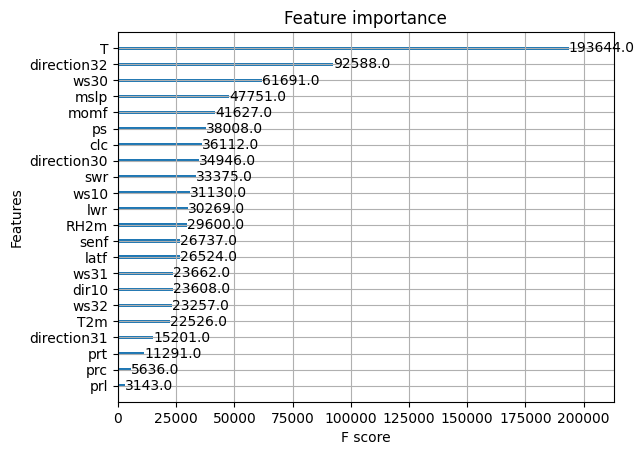

In [58]:


'''model = XGBRegressor(max_depth=best_part['max_depth'],
                    n_estimitors= best_part['n_estimitors'],
                    learning_rate = best_part['learning_rate'],
                    min_child_samples = best_part['min_child_samples'],
                    colsample_bytree = best_part['colsample_bytree'],
                    gamma = best_part['gamma'],
                    booster='gbtree',
                    reg_alpha=best_part['reg_alpha'],
                    reg_lambda=best_part['reg_lambda'],
                    random_state=42


)'''


best_part = {'subsample': 1,
'objective' :'reg:linear',
 'reg_lambda': 1,
 'reg_alpha': 0.005,
 'n_estimators': 700,
 'min_child_samples': 10,
 'max_depth':30,
 'learning_rate': 0.005,
 'gamma': 0,
 'colsample_bytree': 0.8
 }

model = XGBRegressor(max_depth=best_part['max_depth'],
                    n_estimators= best_part['n_estimators'],
                    learning_rate = best_part['learning_rate'],
                    min_child_samples = best_part['min_child_samples'],
                    colsample_bytree = best_part['colsample_bytree'],
                    gamma = best_part['gamma'],
                    booster='gbtree',
                    reg_alpha=best_part['reg_alpha'],
                    reg_lambda=best_part['reg_lambda'],

)

model.fit(X_train,y_train)
 
plot_importance(model)

In [59]:
y_pred_test = model.predict(X_test)
R2  = R2_func(y_test,y_pred_test,'The R2 of test')

y_pred = model.predict(X_train)
R22 =  R2_func(y_train,y_pred,'The R2 of train')

valid['prediction'] = y_pred_test

valid_larger = valid[valid['power'] >=0.1]
y_prediction = valid_larger['prediction']
y_real = valid_larger['power']

MAPE1 = MAPE(y_prediction,y_real)
print('MAPE',MAPE1)


RMSE = rmse_func(y_prediction,y_real)
print('RSME',RMSE)
print('预测平均值',y_prediction.mean())
print('真实平均值',y_real.mean())

smape = smape_func(y_prediction,y_real)
print('SMAPE',smape)


The R2 of test -0.31488862137906914
The R2 of train -0.018894217890099263
MAPE 2.127462518953566
RSME 9.991949237210795
预测平均值 3.7799397
真实平均值 8.454059149999999
SMAPE 1.0547663298015093


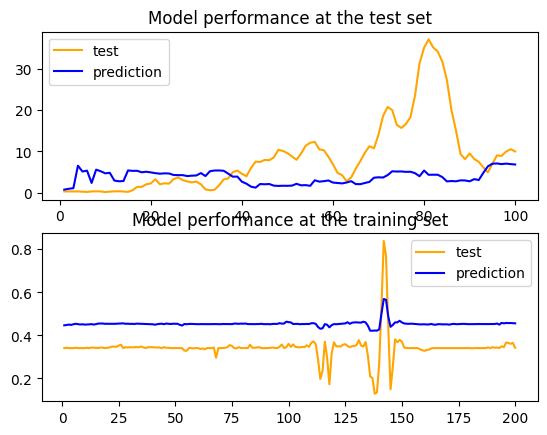

In [60]:
from numpy import size


plt.subplot(2, 1, 1)
plt.plot(range(1,101),y_test[:100],c="orange",label="test")
plt.plot(range(1,101),y_pred_test[:100],c="blue",label="prediction")
plt.title('Model performance at the test set')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(1,201),y_train[:200],c="orange",label="test")
plt.plot(range(1,201),y_pred[:200],c="blue",label="prediction")
plt.title('Model performance at the training set')
plt.legend()

In [61]:
# 这个是之前提到的那个百分率
# accuracy_factor = np.sqrt(sum((np.array(y_prediction) - np.array(y_real)) ** 2  / (y_real**2) ) )/len(y_real)

# print(accuracy_factor)
